In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import citypy
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

75.33460474340396 161.01905402778033
-61.646462171866816 49.53480762580696
69.10243378334499 -102.33282508156972
-82.77892826375681 70.8280917385976
12.79714278923592 -30.223355646429496
-7.967506844739489 161.09154057857182
-29.106622942604474 152.1017829523526
-66.73784585213289 4.3221885262391595
62.83246891555268 -27.018165635757725
-57.54248245425744 -128.50628216985663
-57.562592575595794 -1.324193504503711
-31.40400330590073 -135.28830594006502
-63.15449887742326 -41.28286686936275
82.2331972456115 156.2147905002734
-42.12487107652947 -13.947897769549542
7.740368949757226 39.69707614434867
2.3391480487567833 91.07249208709436
59.55902873190212 101.05116383193382
-36.50461175013798 -48.371210694196634
-46.00935794318005 150.5759041068706
86.89138438296388 91.14318335712017
-25.194595127763833 78.0099845619057
86.60795464069264 159.46977249764194
-31.053481711947867 -133.67776075562526
69.61581517131657 -14.070355309682924
-63.821487631199815 -74.73179404674461
31.951913024848707 

-63.49009541205397 137.9190777603274
-19.329076797172064 4.274216771395686
-59.84279505600906 139.92527653699034
-9.905206083857607 28.265139551798967
62.175588113899096 147.65837570742184
22.209342281790924 94.01689990175959
23.50368730589146 79.2319282441623
-8.803475492011145 53.63433079688778
-70.70874102888988 120.3002233917129
54.09421595357554 -79.44246399733078
69.9158453382862 102.43583260579834
51.96981460511677 123.73828842229148
-85.49828704551663 162.27503780011517
-64.32125422295097 -98.43027511377171
33.922547528407605 163.92705380371052
14.020376092330906 -142.48452766635558
24.55412341242419 60.7877295676862
-60.44572746057318 -65.09245173383104
84.35227185879987 25.354965730550447
-69.30042992536218 139.0589231051115
-31.57149338184138 118.10883137977419
22.304516762092376 -154.6921111768926
11.14710724879599 73.13240290517192
15.910917478705585 -107.42045593373442
23.15833325320446 -50.15086346525487
42.934981124001325 -89.32418095159795
15.010173371049234 94.4657258

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | auki
Processing Record 7 of Set 1 | warwick
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | olafsvik
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | robe
Processing Record 16 of Set 1 | banda aceh
Processing Record 17 of Set 1 | vanavara
Processing Record 18 of Set 1 | santa vitoria do palmar
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 22 of Set 1 | husavik
Processing Record 23 of

Processing Record 41 of Set 4 | farmington
Processing Record 42 of Set 4 | el tigre
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | khasan
Processing Record 45 of Set 4 | yerbogachen
Processing Record 46 of Set 4 | caceres
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | duluth
Processing Record 49 of Set 4 | springdale
Processing Record 50 of Set 4 | henties bay
Processing Record 1 of Set 5 | namatanai
Processing Record 2 of Set 5 | sechura
Processing Record 3 of Set 5 | abhar
Processing Record 4 of Set 5 | havre-saint-pierre
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | kaitangata
Processing Record 7 of Set 5 | padang
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | portland
Processing Record 10 of Set 5 | salamiyah
Processing Record 11 of Set 5 | caravelas
Processing Record 12 of Set 5 | matamoros
Processing Record 13 of Set 5 | e

Processing Record 33 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 34 of Set 8 | cockburn town
Processing Record 35 of Set 8 | quimper
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | arman
Processing Record 38 of Set 8 | arifwala
Processing Record 39 of Set 8 | yeppoon
Processing Record 40 of Set 8 | russell
Processing Record 41 of Set 8 | nantucket
Processing Record 42 of Set 8 | narsaq
Processing Record 43 of Set 8 | degollado
Processing Record 44 of Set 8 | altamira
Processing Record 45 of Set 8 | saint-pierre
Processing Record 46 of Set 8 | linapacan
City not found. Skipping...
Processing Record 47 of Set 8 | rudbar
Processing Record 48 of Set 8 | dolores
Processing Record 49 of Set 8 | tres arroyos
Processing Record 50 of Set 8 | labytnangi
Processing Record 1 of Set 9 | amapa
Processing Record 2 of Set 9 | yaan
Processing Record 3 of Set 9 | iqaluit
Processing Record 4 of Set 9 | cusco
Processing Record 5 of Set 9 | batemans bay
Proce

Processing Record 19 of Set 12 | ayolas
Processing Record 20 of Set 12 | oranjestad
Processing Record 21 of Set 12 | poplar bluff
Processing Record 22 of Set 12 | vestmannaeyjar
Processing Record 23 of Set 12 | victor harbor
Processing Record 24 of Set 12 | lorengau
Processing Record 25 of Set 12 | boa vista
Processing Record 26 of Set 12 | khani
Processing Record 27 of Set 12 | khor
Processing Record 28 of Set 12 | okrika
Processing Record 29 of Set 12 | omsukchan
Processing Record 30 of Set 12 | tuy hoa
Processing Record 31 of Set 12 | imbituba
Processing Record 32 of Set 12 | cayenne
Processing Record 33 of Set 12 | taft
Processing Record 34 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 35 of Set 12 | gladstone
Processing Record 36 of Set 12 | groditz
City not found. Skipping...
Processing Record 37 of Set 12 | tunduma
Processing Record 38 of Set 12 | macusani
Processing Record 39 of Set 12 | khormuj
City not found. Skipping...
Processing Record 40 of Set 12 | 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-03-19 19:14:47,68.7500,161.3000,-33.11,99,0,2.15
1,East London,ZA,2021-03-19 19:14:47,-33.0153,27.9116,66.20,94,75,2.30
2,Yellowknife,CA,2021-03-19 19:14:47,62.4560,-114.3525,28.99,58,75,13.80
3,Sao Filipe,CV,2021-03-19 19:14:48,14.8961,-24.4956,73.71,71,0,8.50
4,Auki,SB,2021-03-19 19:14:48,-8.7676,160.7034,77.72,86,6,4.25


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#Creating Visualizations

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

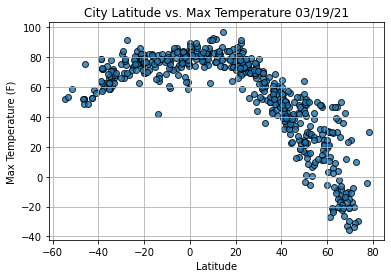

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

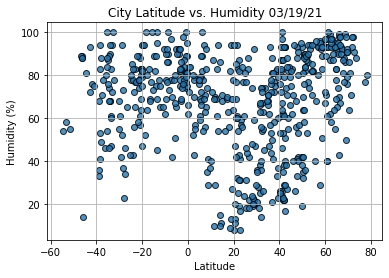

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

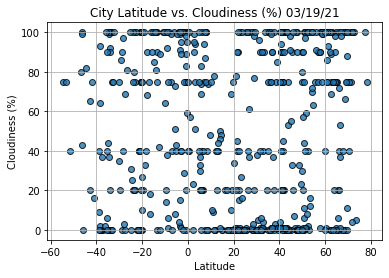

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

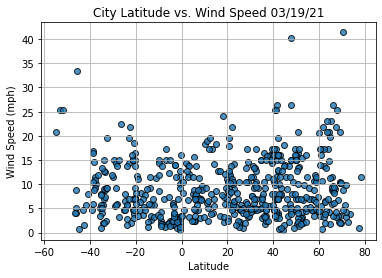

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

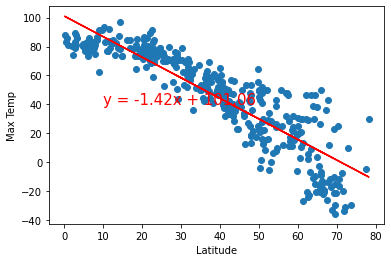

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

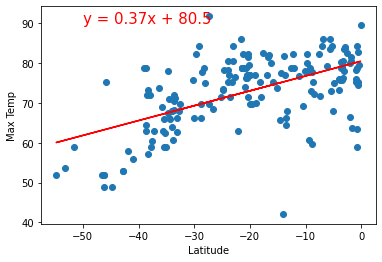

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


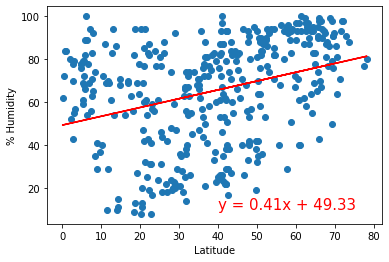

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

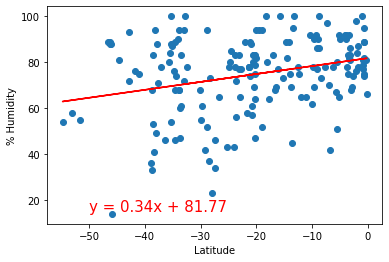

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

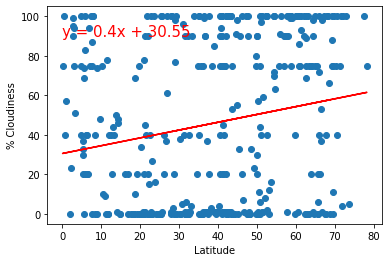

In [22]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,90))

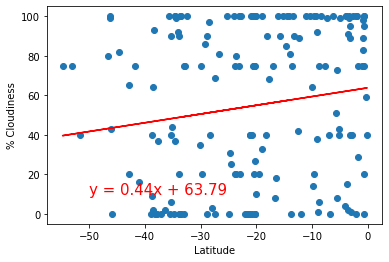

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,10))

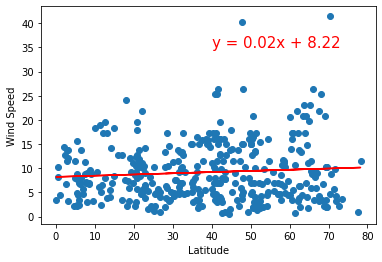

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

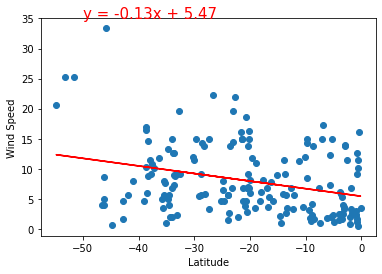

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))